In [3]:

import sys
import os
base = os.path.dirname(os.getcwd())
sys.path.insert(0, base + '/util')
from image_processing_fns import *
import numpy as np

In [4]:
im_path = base + '/data/test/images'
matrix_path = base + '/data/test/images_numpy'
pickles_path = base + '/data/test/features/feat_dict.p'
MAX_ARRAY_SIZE = 100

In [6]:
from __future__ import absolute_import
from __future__ import print_function

import pickle

import numpy
from six.moves import range
from spatialtree import spatialtree

all_feats = pickle.load(open(pickles_path, "rb"))
count = -1

D = 4096
X = dict()

In [7]:

for k in all_feats:
    X[str(k)] = all_feats[k]

In [25]:
print('Building tree...')
T = spatialtree(X, rule='kd', spill=0.3)
print('done.')

Building tree...
done.


In [26]:
print(('# items in tree    : ', len(T)))
print(('Dimensionality     : ', T.getDimension()))
print(('Height of tree     : ', T.getHeight()))
print(('Spill percentage   : ', T.getSpill()))
print(('Split rule         : ', T.getRule()))

('# items in tree    : ', 569)
('Dimensionality     : ', 4096)
('Height of tree     : ', 1)
('Spill percentage   : ', 0.3)
('Split rule         : ', 'kd')


In [27]:
knn_1 = T.k_nearest(X, k=10, index='1')
print(('KNN(1)           : ', knn_1))


knn_72 = T.k_nearest(X, k=10, index='72')
print(('KNN(72)           : ', knn_72))


knn_13 = T.k_nearest(X, k=10, index='13')
print(('KNN(13)           : ', knn_13))

knn_503 = T.k_nearest(X, k=10, index='503')
print(('KNN(503)           : ', knn_503))


('KNN(1)           : ', ['462', '72', '386', '13', '390', '2', '508', '68', '62', '9'])
('KNN(72)           : ', ['508', '438', '68', '146', '35', '337', '454', '144', '386', '368'])
('KNN(13)           : ', ['508', '162', '386', '146', '72', '438', '2', '452', '276', '35'])
('KNN(503)           : ', ['266', '508', '216', '285', '219', '244', '295', '554', '438', '136'])


In [28]:
array_dict = dict()
for m in os.listdir(matrix_path):
    array = np.load(os.path.join(matrix_path, m))
    array_num = int(m[:-4])
    
    if array_num in array_dict:
        array_dict[array_num].extend(array)
    else:
        array_dict[array_num] = array
    print("Loaded array {}, array num: {}".format(m, array_num))
for k in array_dict:
    print (len(array_dict[k]))

Loaded array 0.npy, array num: 0
Loaded array 1.npy, array num: 1
Loaded array 2.npy, array num: 2
Loaded array 3.npy, array num: 3
Loaded array 4.npy, array num: 4
Loaded array 5.npy, array num: 5
100
100
100
100
100
69


In [29]:
import math
def test_ims(arraydict, max_array_size, idxs):
    
    for i in idxs:
        i = int(i)
        array_num = math.floor(i / 100)
        im_indx = i % 100
        im = arraydict[array_num][im_indx]
        fname = str(array_num * max_array_size + im_indx + 1) + ".jpg"
        print("Matrix num: {} idx: {}: image file: {}".format(
            array_num, im_indx, fname))
        displayImageInline(im)
    print()
    print()


def print_og(idx):
    print("original image")
    test_ims(array_dict, MAX_ARRAY_SIZE, [str(idx)])


original image
Matrix num: 0 idx: 1: image file: 2.jpg


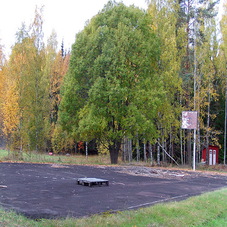



Matrix num: 4 idx: 62: image file: 463.jpg


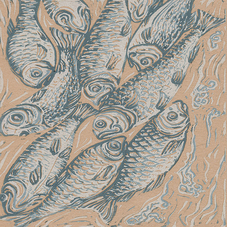

Matrix num: 0 idx: 72: image file: 73.jpg


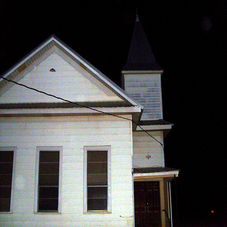

Matrix num: 3 idx: 86: image file: 387.jpg


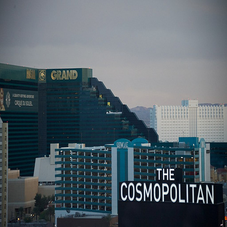

Matrix num: 0 idx: 13: image file: 14.jpg


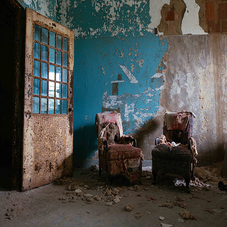

Matrix num: 3 idx: 90: image file: 391.jpg


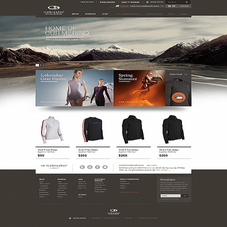

Matrix num: 0 idx: 2: image file: 3.jpg


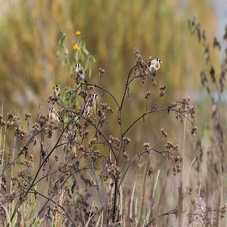

Matrix num: 5 idx: 8: image file: 509.jpg


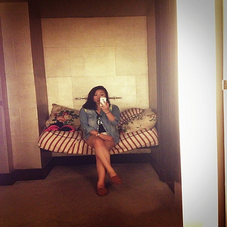

Matrix num: 0 idx: 68: image file: 69.jpg


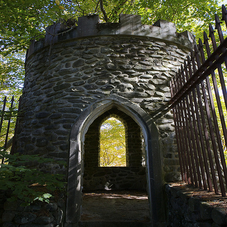

Matrix num: 0 idx: 62: image file: 63.jpg


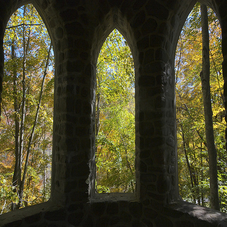

Matrix num: 0 idx: 9: image file: 10.jpg


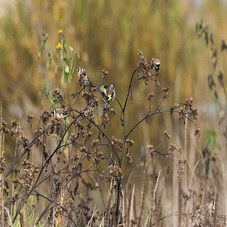



original image
Matrix num: 0 idx: 72: image file: 73.jpg


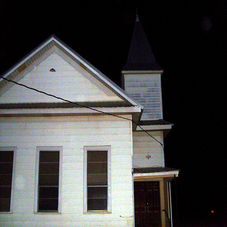



Matrix num: 5 idx: 8: image file: 509.jpg


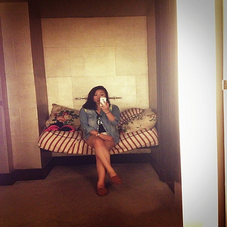

Matrix num: 4 idx: 38: image file: 439.jpg


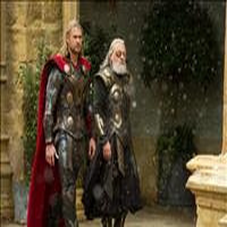

Matrix num: 0 idx: 68: image file: 69.jpg


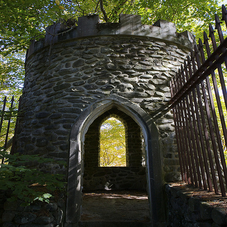

Matrix num: 1 idx: 46: image file: 147.jpg


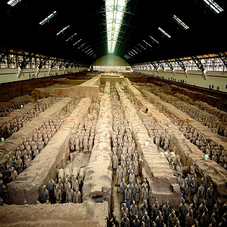

Matrix num: 0 idx: 35: image file: 36.jpg


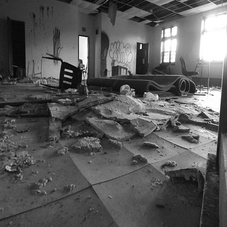

Matrix num: 3 idx: 37: image file: 338.jpg


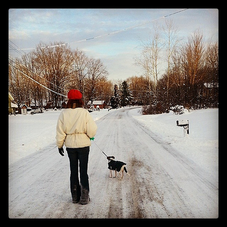

Matrix num: 4 idx: 54: image file: 455.jpg


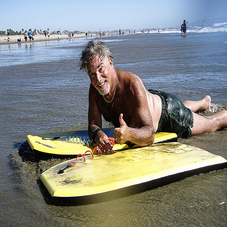

Matrix num: 1 idx: 44: image file: 145.jpg


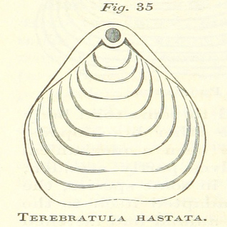

Matrix num: 3 idx: 86: image file: 387.jpg


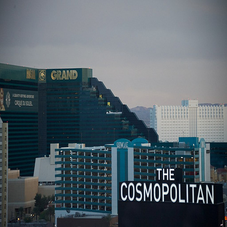

Matrix num: 3 idx: 68: image file: 369.jpg


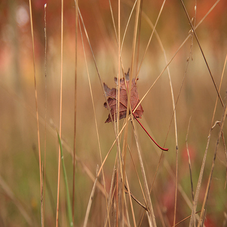



original image
Matrix num: 0 idx: 13: image file: 14.jpg


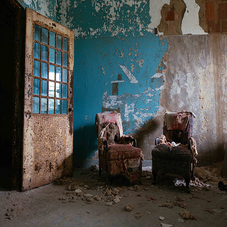



Matrix num: 5 idx: 8: image file: 509.jpg


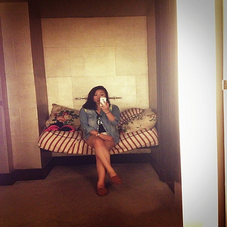

Matrix num: 1 idx: 62: image file: 163.jpg


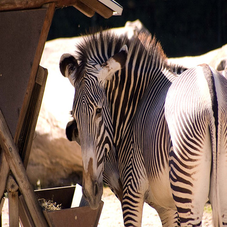

Matrix num: 3 idx: 86: image file: 387.jpg


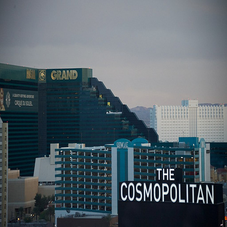

Matrix num: 1 idx: 46: image file: 147.jpg


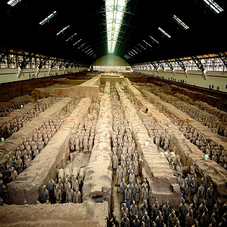

Matrix num: 0 idx: 72: image file: 73.jpg


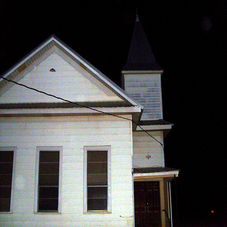

Matrix num: 4 idx: 38: image file: 439.jpg


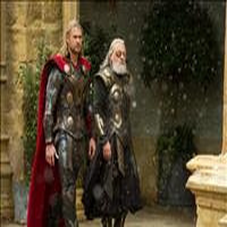

Matrix num: 0 idx: 2: image file: 3.jpg


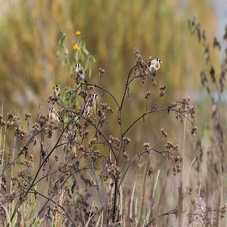

Matrix num: 4 idx: 52: image file: 453.jpg


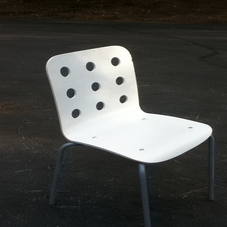

Matrix num: 2 idx: 76: image file: 277.jpg


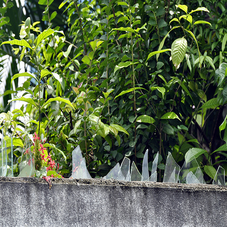

Matrix num: 0 idx: 35: image file: 36.jpg


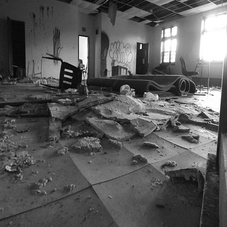



original image
Matrix num: 5 idx: 3: image file: 504.jpg


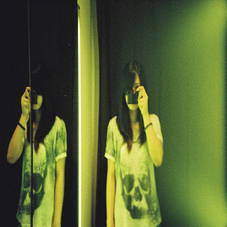



Matrix num: 2 idx: 66: image file: 267.jpg


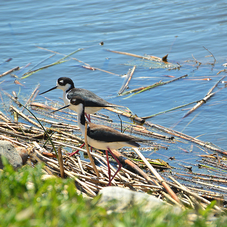

Matrix num: 5 idx: 8: image file: 509.jpg


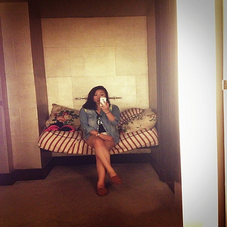

Matrix num: 2 idx: 16: image file: 217.jpg


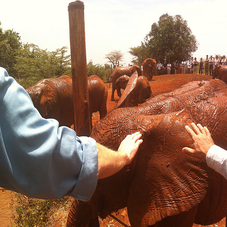

Matrix num: 2 idx: 85: image file: 286.jpg


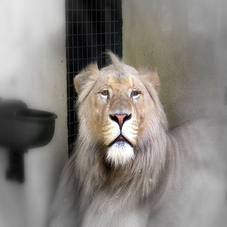

Matrix num: 2 idx: 19: image file: 220.jpg


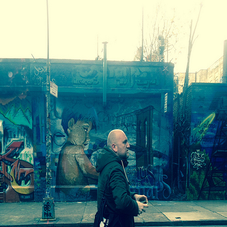

Matrix num: 2 idx: 44: image file: 245.jpg


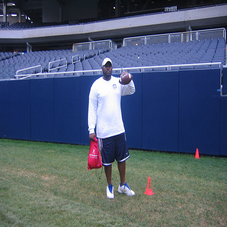

Matrix num: 2 idx: 95: image file: 296.jpg


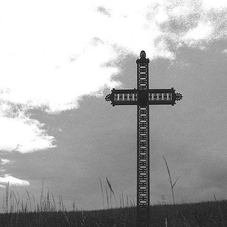

Matrix num: 5 idx: 54: image file: 555.jpg


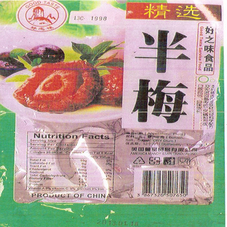

Matrix num: 4 idx: 38: image file: 439.jpg


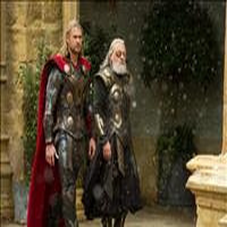

Matrix num: 1 idx: 36: image file: 137.jpg


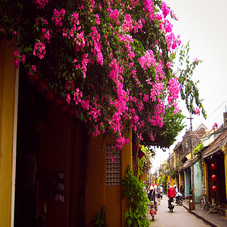

In [30]:
print_og(1)
test_ims(array_dict, MAX_ARRAY_SIZE, knn_1)
print_og(72)

test_ims(array_dict, MAX_ARRAY_SIZE, knn_72)
print_og(13)

test_ims(array_dict, MAX_ARRAY_SIZE, knn_13)
print_og(503)

test_ims(array_dict, MAX_ARRAY_SIZE, knn_503)

In [21]:
##Actual top 10
import operator
vals = dict()
for k in all_feats:
    vals[k] = np.dot(all_feats[1], all_feats[k])
sorted_vals = sorted(vals.items(), key=operator.itemgetter(1), reverse=True)
count = 0
topk = []
for k in sorted_vals:
    if count < 11:
        topk.append(k[0])
        count +=1
    else:
        break

In [22]:
print(topk[1:])

[522, 361, 63, 133, 462, 448, 323, 13, 375, 377]


Matrix num: 5 idx: 22: image file: 523.jpg


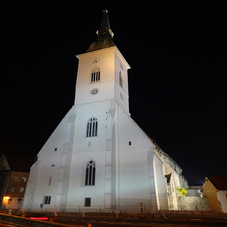

Matrix num: 3 idx: 61: image file: 362.jpg


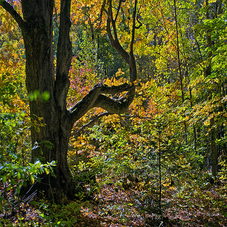

Matrix num: 0 idx: 63: image file: 64.jpg


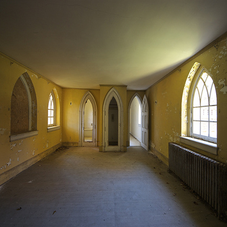

Matrix num: 1 idx: 33: image file: 134.jpg


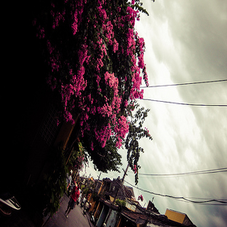

Matrix num: 4 idx: 62: image file: 463.jpg


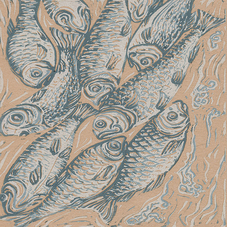

Matrix num: 4 idx: 48: image file: 449.jpg


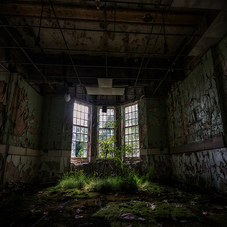

Matrix num: 3 idx: 23: image file: 324.jpg


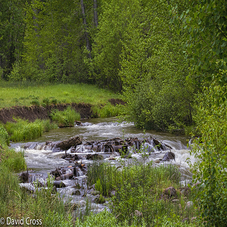

Matrix num: 0 idx: 13: image file: 14.jpg


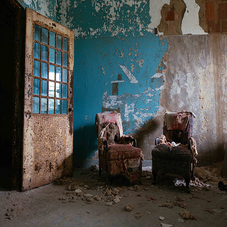

Matrix num: 3 idx: 75: image file: 376.jpg


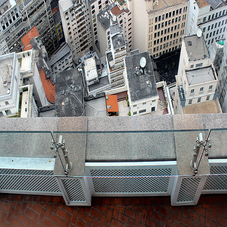

Matrix num: 3 idx: 77: image file: 378.jpg


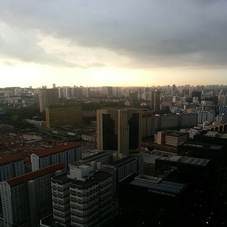

In [23]:
test_ims(array_dict, MAX_ARRAY_SIZE, topk[1:])


********Original*******
Matrix num: 0 idx: 1: image file: 2.jpg


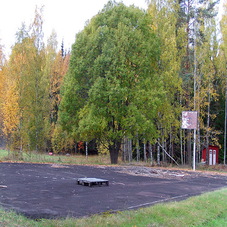



********Neighbor*******
['462']
Matrix num: 4 idx: 62: image file: 463.jpg


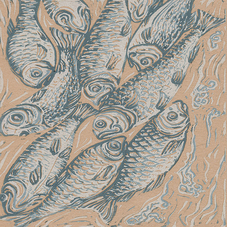



********Original*******
Matrix num: 0 idx: 2: image file: 3.jpg


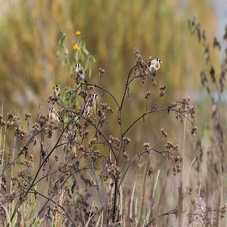



********Neighbor*******
['112']
Matrix num: 1 idx: 12: image file: 113.jpg


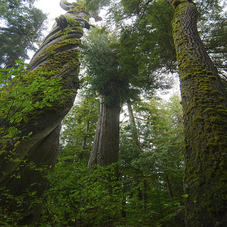



********Original*******
Matrix num: 0 idx: 3: image file: 4.jpg


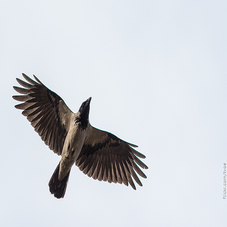



********Neighbor*******
['10']
Matrix num: 0 idx: 10: image file: 11.jpg


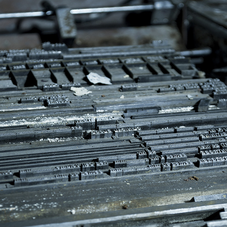



********Original*******
Matrix num: 0 idx: 4: image file: 5.jpg


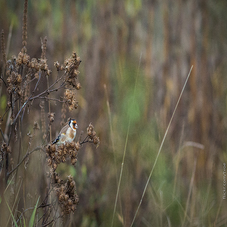



********Neighbor*******
['285']
Matrix num: 2 idx: 85: image file: 286.jpg


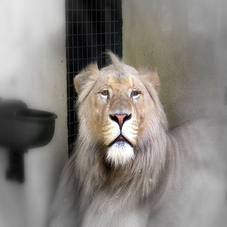



********Original*******
Matrix num: 0 idx: 5: image file: 6.jpg


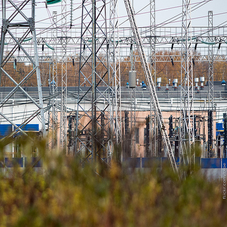



********Neighbor*******
['10']
Matrix num: 0 idx: 10: image file: 11.jpg


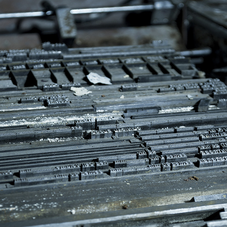



********Original*******
Matrix num: 0 idx: 6: image file: 7.jpg


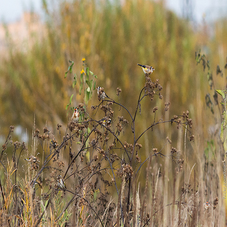



********Neighbor*******
['7']
Matrix num: 0 idx: 7: image file: 8.jpg


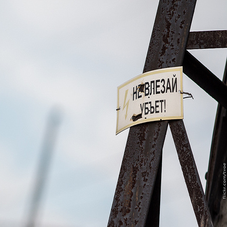



********Original*******
Matrix num: 0 idx: 7: image file: 8.jpg


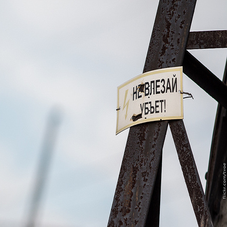



********Neighbor*******
['10']
Matrix num: 0 idx: 10: image file: 11.jpg


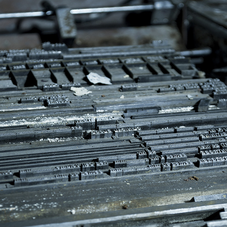



********Original*******
Matrix num: 0 idx: 8: image file: 9.jpg


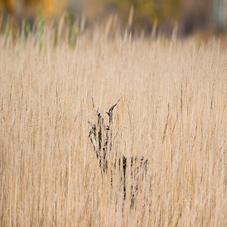



********Neighbor*******
['77']
Matrix num: 0 idx: 77: image file: 78.jpg


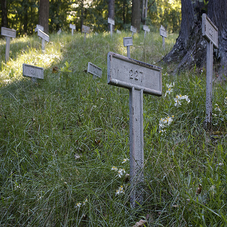



********Original*******
Matrix num: 0 idx: 9: image file: 10.jpg


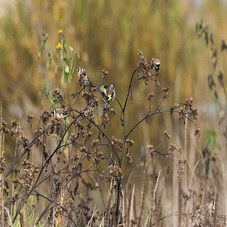



********Neighbor*******
['7']
Matrix num: 0 idx: 7: image file: 8.jpg


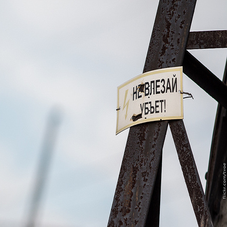



********Original*******
Matrix num: 0 idx: 10: image file: 11.jpg


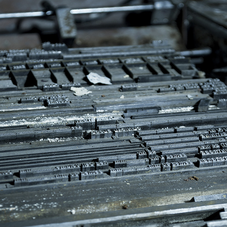



********Neighbor*******
['7']
Matrix num: 0 idx: 7: image file: 8.jpg


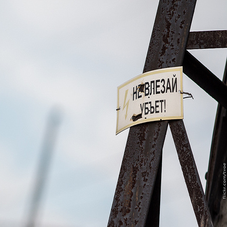

In [32]:

### takes 10 random images, prints image closest to it
import random

for i in range(10):
    random_image = i+1 #random.randrange(1, 56)              
    neighbor = T.k_nearest(X, k=1, index=str(random_image))
    print("********Original*******") 
    test_ims(array_dict, MAX_ARRAY_SIZE, [str(random_image)])
    print("********Neighbor*******") 
    print(neighbor)
    test_ims(array_dict, MAX_ARRAY_SIZE, neighbor)

    

